## Influenced networks

In [1]:
%run imports.py

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
g = nx.Graph()

In [4]:
g.add_edges_from([
    (0,1,{'weight':0.42}),
    (0,2,{'weight':0.24}),
    (0,3,{'weight':-0.12}),
    (1,2,{'weight':0.48}),
    (1,3,{'weight':-0.24}),
    (2,3,{'weight':0.72})
])

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


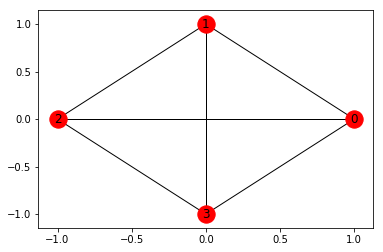

In [5]:
nx.draw_networkx(g,pos=nx.circular_layout(g))

In [6]:
node_list = [0,1,2,3]

In [7]:
L = out_degree_laplacian(g, node_list)

### Influenced dynamics

$\dot{x}=-\left(\mathcal{L}(\mathcal{G})+B B^{\top}\right) x+B u$

In [8]:
from scipy.integrate import solve_ivp

In [9]:
B = np.matrix([[0],[0],[1],[0]])

In [10]:
f1 = lambda t,x: np.asarray(-(L + B.dot(B.T)).dot(x) + np.asarray(0.4*B).reshape((1,4)))[0]

In [11]:
f2 = lambda t,x: np.asarray(-L.dot(x))[0]

In [12]:
res = solve_ivp(fun=f1, t_span=[0,100], y0 = np.random.rand(4))

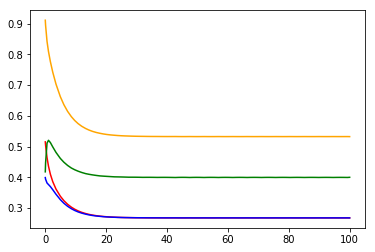

In [13]:
colors = np.array(["red", "blue", "green", "orange"])
for i in np.arange(0,4):
    plt.plot(res.t, res.y[i,:], color = colors[i])

In [14]:
np.linalg.eig(L)

(array([0.    , 0.9804, 2.0196, 0.    ]),
 matrix([[-0.6742, -0.7351,  0.071 , -0.6742],
         [-0.6742,  0.6519,  0.3472, -0.6742],
         [-0.2697,  0.1665, -0.8364, -0.2697],
         [ 0.1348, -0.0833,  0.4182,  0.1348]]))

In [15]:
res.y[:,-1]

array([0.2678, 0.2678, 0.3999, 0.5323])